Importing libraries

In [73]:
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Import dataset

In [74]:
climate_df = pd.read_csv('./data/climate-change_phl.csv')
dengue_df = pd.read_csv('./data/denguecases.csv')

Preprocess dengue dataset and get dengue cases by year 

In [75]:
dengue_df['Dengue_Cases'] = pd.to_numeric(dengue_df['Dengue_Cases'])
dengue_df = dengue_df.groupby(['Year'])['Dengue_Cases'].sum().reset_index()
dengue_df

,Year,Dengue_Cases
0,2008,1523.803458
1,2009,1316.506847
2,2010,1042.441443
3,2011,1225.485238
4,2012,3292.879719
5,2013,4919.088737
6,2014,3207.248208
7,2015,2354.364063
8,2016,1859.130102


Preprocess climate change dataset

In [76]:
climate_df.drop([0], inplace=True) # Drop 2nd row -> column names
climate_df.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis=1, inplace=True)

The indicators we are interested are:
- CO2 emissions (kt)
- Methane emissions (kt of CO2 equivalent)
- Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
- Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)

In [77]:
a = climate_df.loc[climate_df['Indicator Name'].isin([
    'CO2 emissions (kt)',
    'Methane emissions (kt of CO2 equivalent)',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
    'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
]) & climate_df['Year'].isin([str(year) for year in range(2008, 2017)])]
b = pd.DataFrame(range(2008, 2017), columns=['Year'])
for indicator in a['Indicator Name'].unique():
    b[indicator] = pd.to_numeric(a.loc[climate_df['Indicator Name'] == indicator].sort_values('Year').reset_index()['Value'])
climate_df = b
climate_df

,Year,CO2 emissions (kt),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",Methane emissions (kt of CO2 equivalent),Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
0,2008,76730,-269.602539,63330,11610
1,2009,77520,-40.277832,64070,11880
2,2010,83570,190.957520,62450,12840
3,2011,84470,702.995117,63680,12310
4,2012,88060,4568.796875,64950,12060
5,2013,97800,5153.800781,65610,12470
6,2014,104410,5533.469238,65770,13000
7,2015,113670,5718.791016,65410,12640
8,2016,124920,4267.337891,64990,13300


Fit into a multiple linear regression

Regression coefficient: [[-0.06075698  0.46777009  0.44152669  0.27463402]]
R^2: 0.8038472098850182


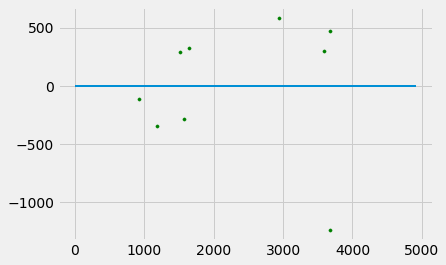

In [168]:
model = LinearRegression()
X = climate_df.drop('Year', axis=1)
Y = dengue_df.drop('Year', axis=1)
model.fit(X, Y)
print('Regression coefficient:', model.coef_)
print('R^2:', model.score(X, Y))

plt.style.use('fivethirtyeight')
plt.scatter(model.predict(X), model.predict(X) - Y, color='green', s=10, label='Data')
plt.hlines(y = 0, xmin = 0, xmax = 4919.088737, linewidth = 2)
plt.show()

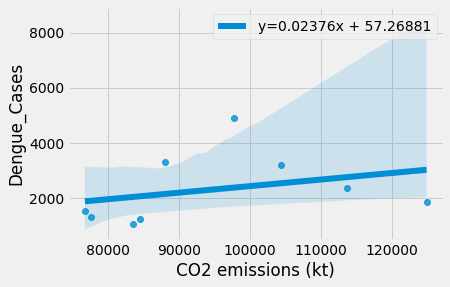

In [164]:
co2_model = LinearRegression().fit(X['CO2 emissions (kt)'].to_numpy().reshape((-1, 1)), Y)
slope = co2_model.coef_[0][0]
intercept = co2_model.intercept_[0]
sns.regplot(x=X['CO2 emissions (kt)'], y=Y, line_kws={'label':"y={0:.5f}x + {1:.5f}".format(slope, intercept)}).legend()

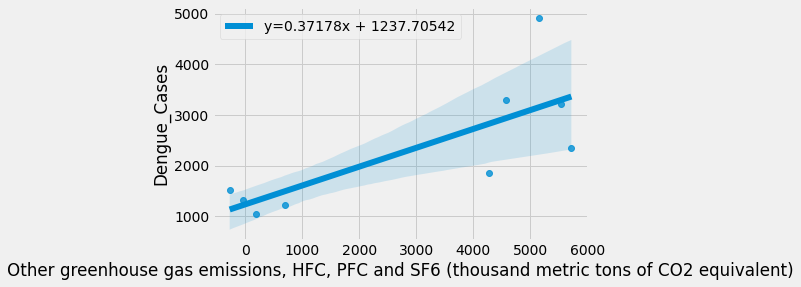

In [165]:
other_model = LinearRegression().fit(X['Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)'].to_numpy().reshape((-1, 1)), Y)
slope = other_model.coef_[0][0]
intercept = other_model.intercept_[0]
sns.regplot(x=X['Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)'], y=Y,
    line_kws={'label':"y={0:.5f}x + {1:.5f}".format(slope, intercept)}
).legend()

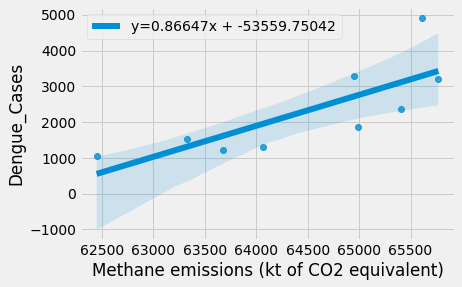

In [171]:
methane_model = LinearRegression().fit(X['Methane emissions (kt of CO2 equivalent)'].to_numpy().reshape((-1, 1)), Y)
slope = methane_model.coef_[0][0]
intercept = methane_model.intercept_[0]
sns.regplot(x=X['Methane emissions (kt of CO2 equivalent)'], y=Y, 
    line_kws={'label':"y={0:.5f}x + {1:.5f}".format(slope, intercept)}).legend()

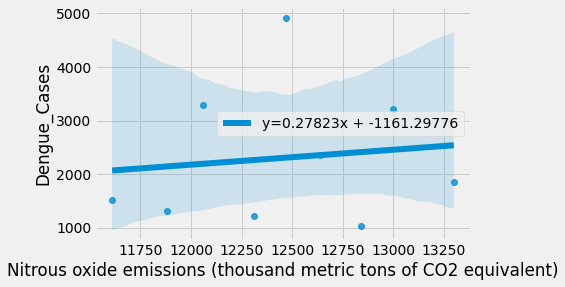

In [174]:
nitrous_model = LinearRegression().fit(X['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'].to_numpy().reshape((-1, 1)), Y)
slope = nitrous_model.coef_[0][0]
intercept = nitrous_model.intercept_[0]
sns.regplot(x=X['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'], y=Y, 
    line_kws={'label':"y={0:.5f}x + {1:.5f}".format(slope, intercept)}).legend()